In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [65]:
#import dataframe from csv file
fb = pd.read_csv('./stocks/facebook.csv',index_col=0)
ms = pd.read_csv('./stocks/microsoft.csv',index_col=0)

In [66]:
#print first 5 rows
#index is the value of first row ususally, values are the other collumns
print(fb.head())
print('++++++++++++++++++++++++++++++++++++++++++++++')

print(fb.tail(5))

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2014-12-31  20.400000  20.510000  19.990000  20.049999  19.459270  4157500
2015-01-02  20.129999  20.280001  19.809999  20.129999  19.536913  2842000
2015-01-05  20.129999  20.190001  19.700001  19.790001  19.206934  4948800
2015-01-06  19.820000  19.840000  19.170000  19.190001  18.624611  4944100
2015-01-07  19.330000  19.500000  19.080000  19.139999  18.576082  8045200
++++++++++++++++++++++++++++++++++++++++++++++
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-30  241.110001  246.419998  238.410004  242.720001  242.720001   
2018-01-31  245.770004  249.270004  244.449997  245.800003  245.800003   
2018-02-01  238.520004  246.899994  238.059998  240.500000  240.500000   
2018-02-02  237.000000  237.970001  231.169998  233.520004

In [67]:
#print size of the table
print(fb.shape)

(780, 6)


In [68]:
print(fb.index)

Index(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
       '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05'],
      dtype='object', name='Date', length=780)


In [69]:
print(fb.index[0])
print(fb.index[-1])

2014-12-31
2018-02-05


In [70]:
print(fb.columns)
print(fb.columns[0])
print(fb.columns[-1])

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open
Volume


In [71]:
print(fb.shape)

(780, 6)


In [72]:
print(fb.describe())

             Open        High         Low       Close   Adj Close  \
count  780.000000  780.000000  780.000000  780.000000  780.000000   
mean    80.212705   81.285654   79.022397   80.264897   79.914215   
std     64.226121   65.048907   63.190963   64.198375   64.327846   
min     19.250000   19.500000   18.940001   19.139999   18.576082   
25%     25.525000   26.085000   24.845000   25.475000   25.134513   
50%     53.379999   54.034999   52.930000   53.420000   53.035403   
75%    113.322502  115.779999  110.297499  113.702501  113.261238   
max    245.770004  249.270004  244.449997  246.850006  246.850006   

             Volume  
count  7.800000e+02  
mean   1.204453e+07  
std    8.221848e+06  
min    1.311200e+06  
25%    7.215200e+06  
50%    9.728700e+06  
75%    1.408885e+07  
max    9.232320e+07  


In [73]:
#Slicing DataFrame by name
print('++++++++++++++++++++++++++++++++++++++++++++++')
print(fb.loc['2015-01-02', 'Close'])
print('++++++++++++++++++++++++++++++++++++++++++++++')
#Slicing DataFrame by name
print('++++++++++++++++++++++++++++++++++++++++++++++')
print(fb.iloc[1, 3])
#Multiple rows slicing
print('++++++++++++++++++++++++++++++++++++++++++++++')
print(fb.loc['2015-01-01':'2015-12-31', 'Close'])
print('++++++++++++++++++++++++++++++++++++++++++++++')
print(fb.iloc[624: , : ])

++++++++++++++++++++++++++++++++++++++++++++++
20.129999
++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++
20.129999
++++++++++++++++++++++++++++++++++++++++++++++
Date
2015-01-02    20.129999
2015-01-05    19.790001
2015-01-06    19.190001
2015-01-07    19.139999
2015-01-08    19.860001
                ...    
2015-12-24    33.169998
2015-12-28    33.139999
2015-12-29    33.680000
2015-12-30    33.389999
2015-12-31    32.959999
Name: Close, Length: 252, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-06-23  158.679993  159.320007  153.220001  153.830002  153.587982   
2017-06-26  155.160004  156.600006  148.330002  152.149994  151.910614   
2017-06-27  151.440002  151.789993  146.350006  146.580002  146.349380   
2017-06-28  149.320007  151.940002  145.750000  151.750000  151.5

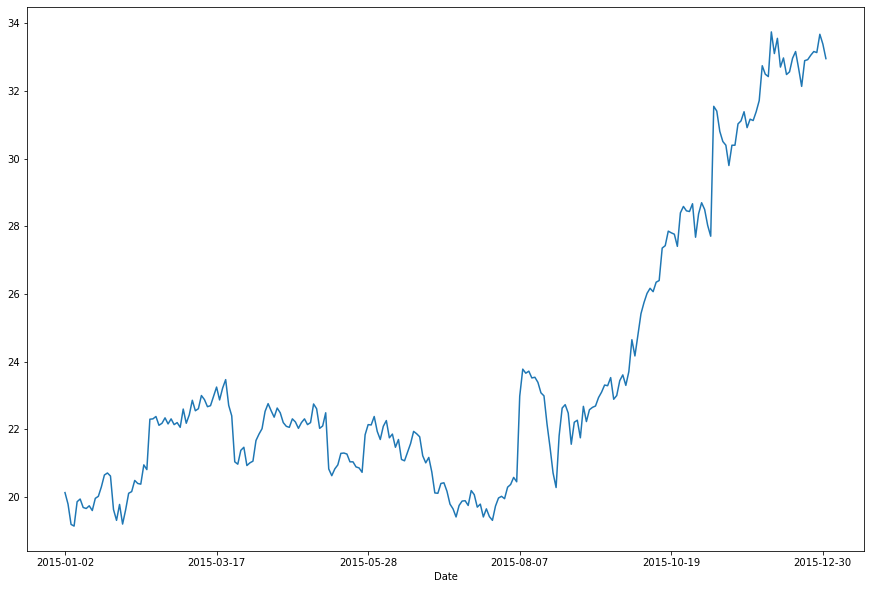

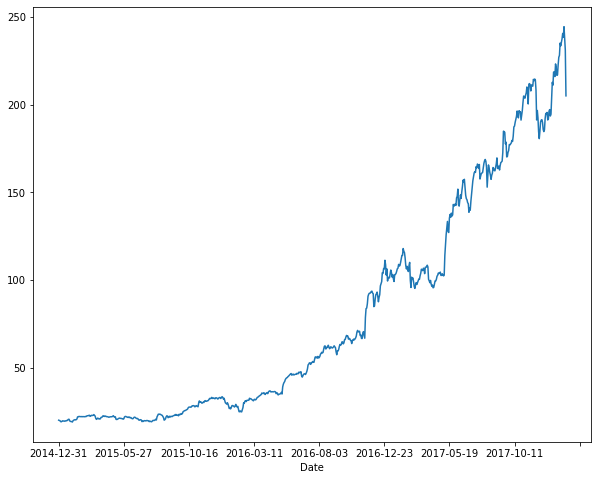

In [74]:
#Vizualizing stock price using plot method
plt.figure(figsize=(15, 10))
fb.loc['2015-01-01':'2015-12-31', 'Close'].plot()
plt.figure(figsize=(10, 8))
fb['Low'].plot()

In [75]:
#Create 'Price difference' column
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']
#print(fb.head())
#print(fb.tail())

In [81]:
#Create 'Return' column
fb['Return'] = fb['PriceDiff'] /fb['Close']
print(fb.loc['2015-01-05', 'Return'])

-0.030318341065268335


In [109]:
#advanced methods to create new column
#List comprehension
fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]
fb['Direction1'] = 0
fb.loc[fb['PriceDiff'] > 0, 'Direction1'] = 1
fb['Direction2'] = np.where(fb['PriceDiff'] > 0, 1, 0 ) 
print(fb.tail(20))
#Format output example
#print('Price difference on {} is {}. direction is {}'.format('2015-01-05', fb['PriceDiff'].loc['2015-01-05'], fb['Direction'].loc['2015-01-05']))


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-08  220.399994  225.000000  218.580002  222.000000  222.000000   
2018-01-09  222.220001  223.820007  218.639999  221.940002  221.940002   
2018-01-10  218.199997  223.820007  216.000000  223.679993  223.679993   
2018-01-11  225.000000  226.270004  223.210007  224.080002  224.080002   
2018-01-12  223.600006  224.990005  221.339996  222.979996  222.979996   
2018-01-16  224.050003  227.509995  216.690002  220.110001  220.110001   
2018-01-17  220.699997  225.119995  216.899994  224.720001  224.720001   
2018-01-18  223.940002  226.639999  222.679993  224.440002  224.440002   
2018-01-19  228.089996  231.089996  227.000000  230.110001  230.110001   
2018-01-22  230.429993  233.759995  228.100006  233.690002  233.690002   
2018-01-23  235.850006  239.830002  235.100006  238.910004  238.910004   
2018-01-24  239.039993  240.490005  23

In [118]:
#Moving Avereage
fb['Average3'] = (fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2))/3  
fb['MA40'] = fb['Close'].rolling(40).mean()
fb['MA200'] = fb['Close'].rolling(200).mean()
#print(fb.tail())


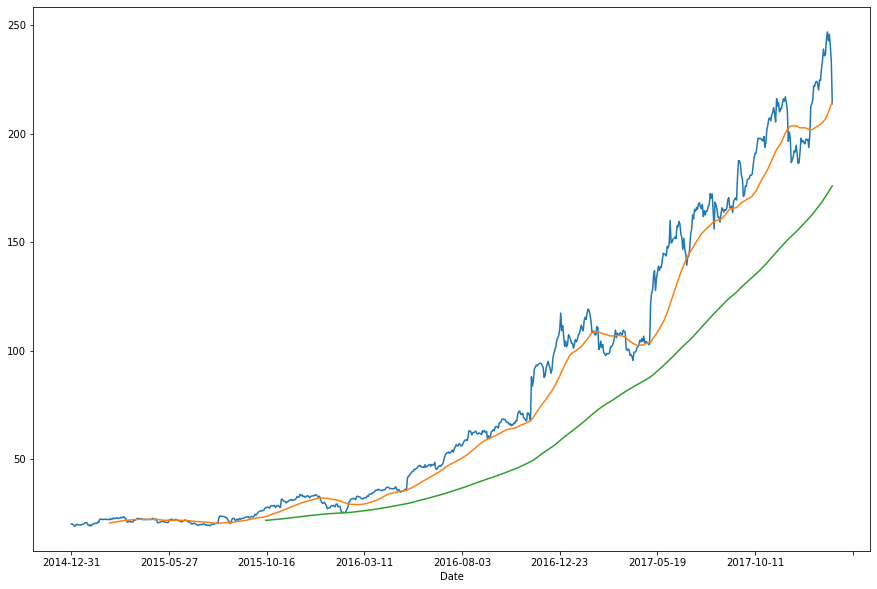

In [121]:
#Plot MA
plt.figure(figsize=(15, 10))
fb['Close'].plot()
fb['MA40'].plot()
fb['MA200'].plot()